# Práctica 3

Considere un problema de búsqueda con estados $\{A, B, C, D, E, F, G, H, I, J\}$ . Donde $A$ es el
estado inicial y J el único estado objetivo. Las acciones que se pueden ejecutar en cada estado se
especifican por una pareja $(s, c)$ donde $s$ es el estado resultante de ejecutar la acción y $c$ es el costo
de la acción:

\begin{align*}
A(h=8)   &: (B, 4),\ (E, 2),\ (H, 3) \\
B(h=3)   &: (C, 4),\ (D, 2),\ (E, 1),\ (G, 4),\ (I, 5) \\
C(h=2)   &: (E, 1),\ (F, 3),\ (G, 3),\ (I, 2) \\
D(h=4)   &: (A, 3),\ (C, 2),\ (E, 5),\ (F, 4),\ (H, 5) \\
E(h=10)  &: (D, 5) \\
F(h=10)  &: (B, 4),\ (H, 5) \\
G(h=13)  &: (H, 1) \\
H(h=12)  &: (F, 4),\ (G, 2) \\
I(h=0)   &: (C, 5),\ (G, 1),\ (H, 4),\ (J, 1) \\
J(h=0)   &: \\
\end{align*}

El valor en paréntesis al frente de cada estado corresponde al valor de la heurística h.

In [1]:
import sys

sys.path.append("..")

from AI_algorithms.state_graphs import Graph, parse_input
from AI_algorithms.state_graphs.searchs import DFSearch, BFSearch, AStarSearch, UCSearch

In [2]:
input_ ='''
A(h = 8) : (B, 4),(E, 2),(H, 3),
B(h = 3) : (C, 4),(D, 2),(E, 1),(G, 4),(I, 5),
C(h = 2) : (E, 1),(F, 3),(G, 3),(I, 2),
D(h = 4) : (A, 3),(C, 2),(E, 5),(F, 4),(H, 5),
E(h = 10) : (D, 5),
F(h = 10) : (B, 4),(H, 5),
G(h = 13) : (H, 1),
H(h = 12) : (F, 4),(G, 2),
I(h = 0) : (C, 5),(G, 1),(H, 4),(J, 1),
J(h = 0) :
'''

c,h =parse_input(input_)
G = Graph(c,h)
G.print_structure()

A(h =  8)  :  (B,4), (E,2), (H,3)
B(h =  3)  :  (C,4), (D,2), (E,1), (G,4), (I,5)
C(h =  2)  :  (E,1), (F,3), (G,3), (I,2)
D(h =  4)  :  (A,3), (C,2), (E,5), (F,4), (H,5)
E(h = 10)  :  (D,5)
F(h = 10)  :  (B,4), (H,5)
G(h = 13)  :  (H,1)
H(h = 12)  :  (F,4), (G,2)
I(h =  0)  :  (C,5), (G,1), (H,4), (J,1)
J(h =  0)  :  


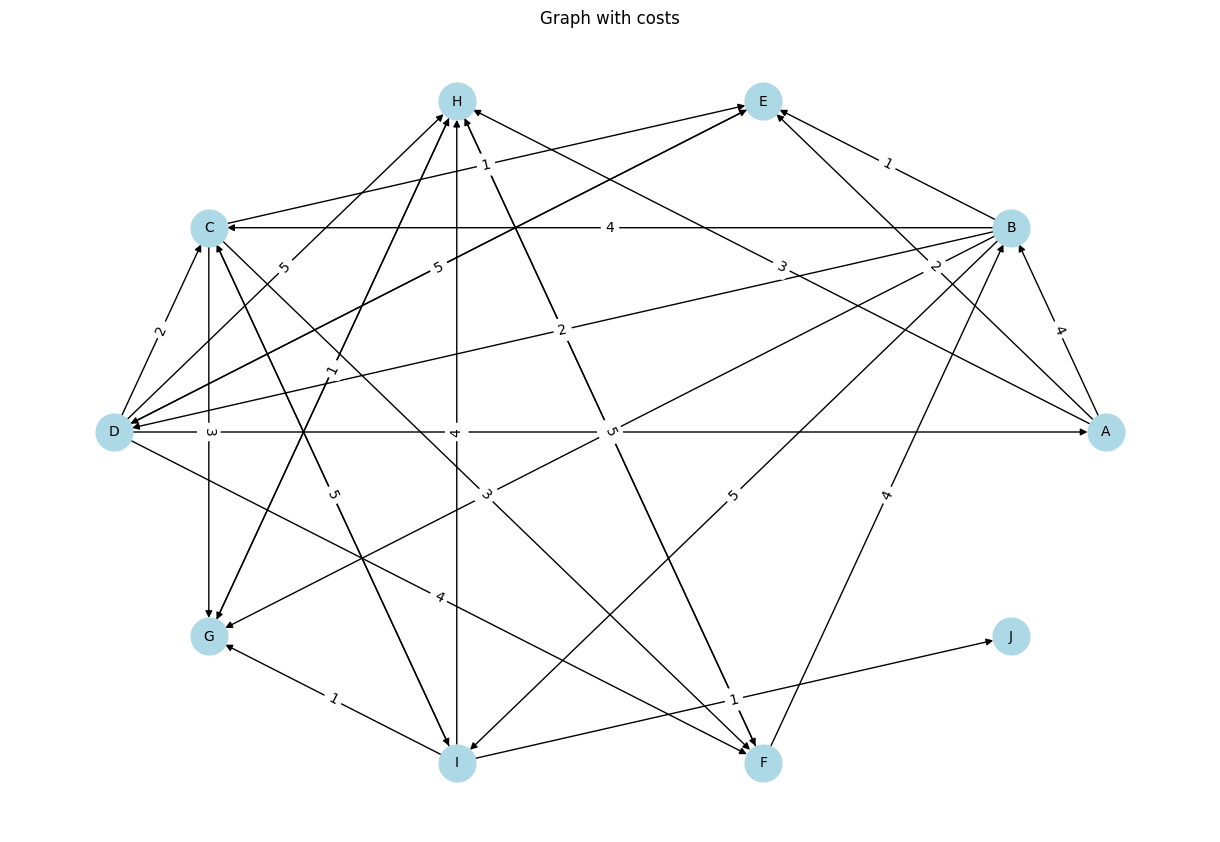

In [3]:
G.draw(title = 'Graph with costs')

## 1. Búsqueda en profundidad (DFS)

Ejecute búsqueda en profundidad, teniendo en cuenta que las estados entran a la pila en orden inverso de su etiqueta, de manera que al extraerlos de la pila saldría el estado con menor etiqueta. Igualmente, tenga en cuenta que el algoritmo de búsqueda previene ciclos llevando una lista de nodos alcanzados (reached).

In [4]:
path = DFSearch(G,'A','J',verbose = True, criteria = 'descending label')
if path: print('\nFinal path found: '+' -> '.join(path))

Out: A  -  Fridge: ['A']
Out: B  -  Fridge: ['H', 'E', 'B']
Out: C  -  Fridge: ['H', 'E', 'I', 'G', 'D', 'C']
Out: F  -  Fridge: ['H', 'E', 'I', 'G', 'D', 'F']
Out: D  -  Fridge: ['H', 'E', 'I', 'G', 'D']
Out: G  -  Fridge: ['H', 'E', 'I', 'G']
Out: I  -  Fridge: ['H', 'E', 'I']
Out: J  -  Fridge: ['H', 'E', 'J']

Out order: A B C F D G I J

Final path found: A -> B -> I -> J


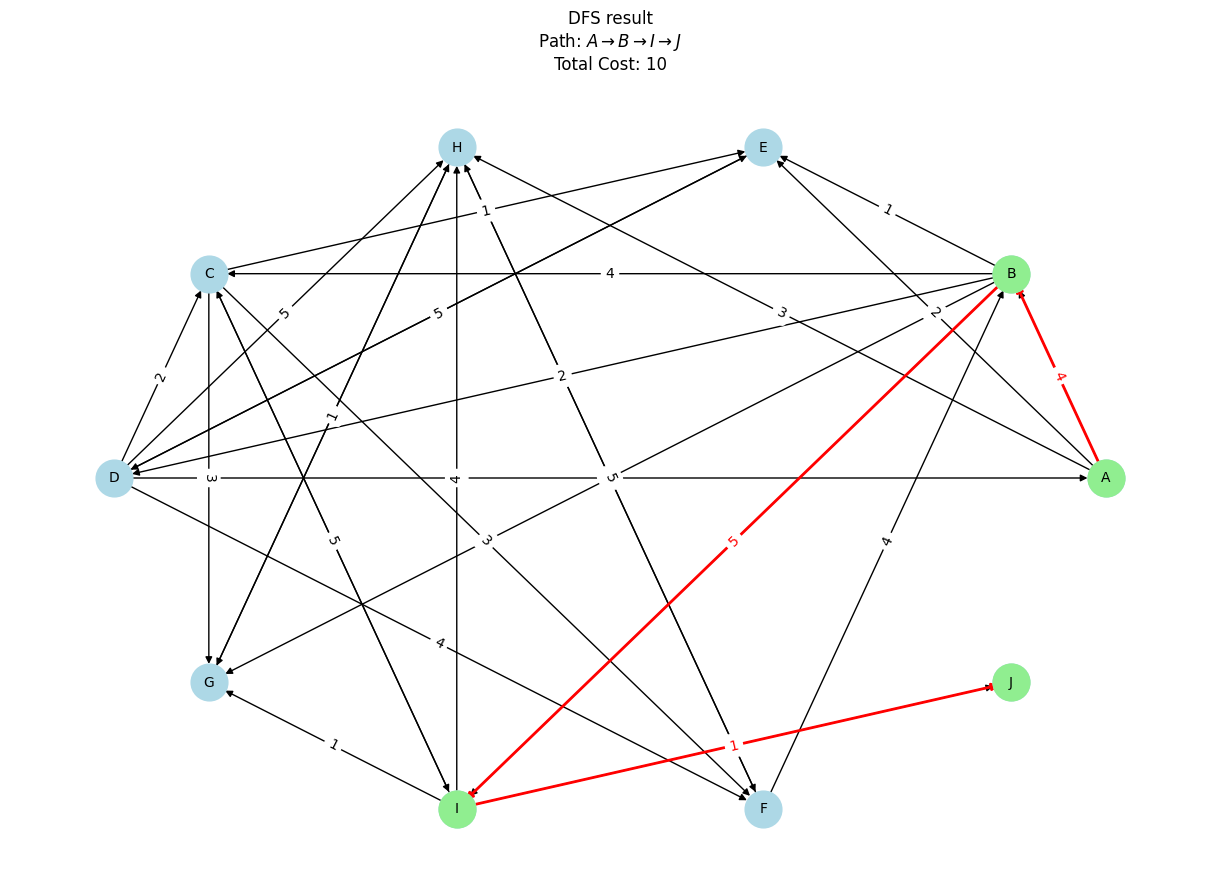

In [5]:
G.draw(path = path, title = 'DFS result')

## 2. Búsqueda en amplitud (BFS)

Ejecute búsqueda en amplitud, teniendo en cuenta que las estados entran a la cola en el orden
de su etiqueta.

In [6]:
path = BFSearch(G,'A','J',verbose = True, criteria = 'ascending label', reached = False)
if path: print('\nFinal path found: '+' -> '.join(path))

Out: A  -  Fridge: ['A']
Out: B  -  Fridge: ['B', 'E', 'H']
Out: E  -  Fridge: ['E', 'H', 'C', 'D', 'E', 'G', 'I']
Out: H  -  Fridge: ['H', 'C', 'D', 'E', 'G', 'I', 'D']
Out: C  -  Fridge: ['C', 'D', 'E', 'G', 'I', 'D', 'F', 'G']
Out: D  -  Fridge: ['D', 'E', 'G', 'I', 'D', 'F', 'G', 'E', 'F', 'G', 'I']
Out: E  -  Fridge: ['E', 'G', 'I', 'D', 'F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H']
Out: G  -  Fridge: ['G', 'I', 'D', 'F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'D']
Out: I  -  Fridge: ['I', 'D', 'F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'D', 'H']
Out: D  -  Fridge: ['D', 'F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'D', 'H', 'C', 'G', 'H', 'J']
Out: F  -  Fridge: ['F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'D', 'H', 'C', 'G', 'H', 'J', 'A', 'C', 'E', 'F', 'H']
Out: G  -  Fridge: ['G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'D', 'H', 'C', 'G', 'H', 'J', 'A', 'C', 'E', 'F', 'H', 'B', 'H']
Out: E  -  Fridge: ['E', 'F', 'G', 

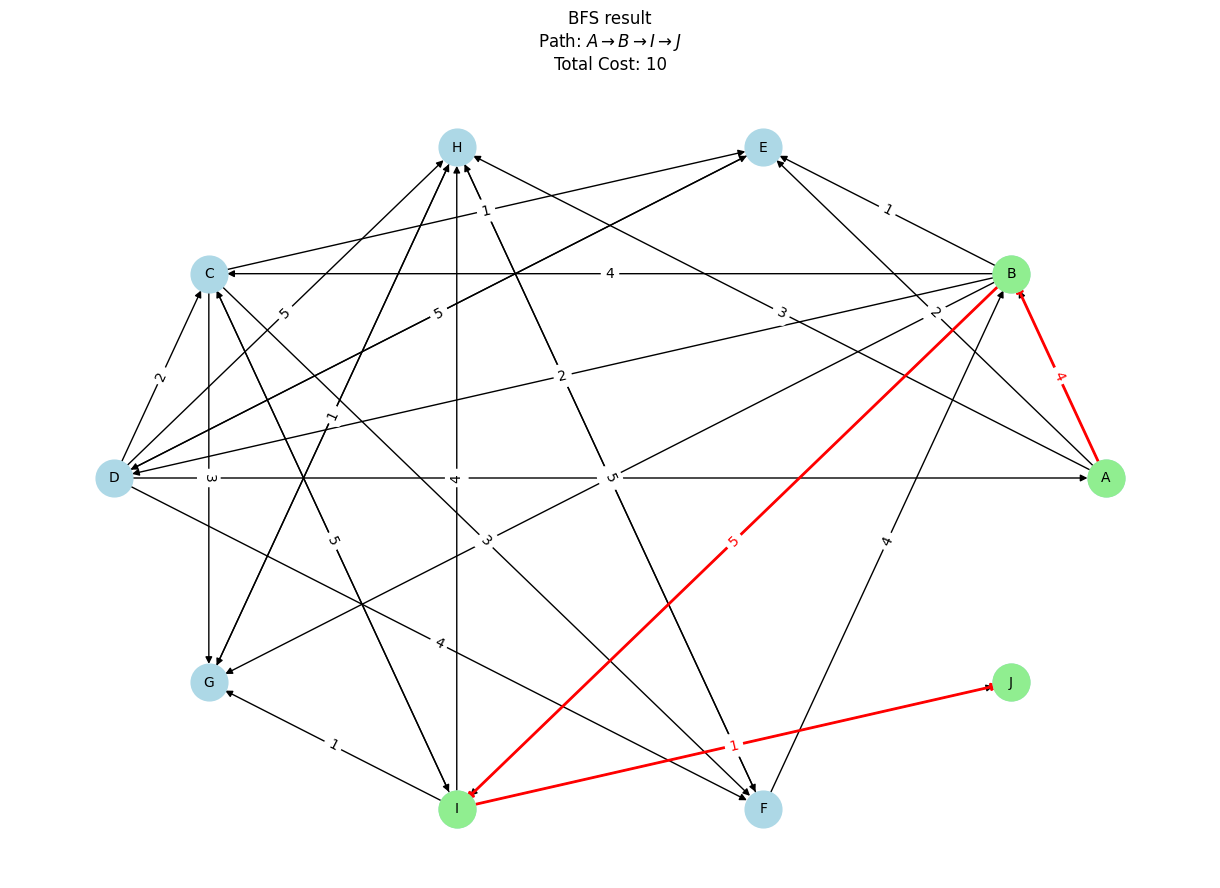

In [7]:
G.draw(path = path, title = 'BFS result')

## 3. Búsqueda de costo uniforme (UCS)

Ahora ejecute búsqueda de costo uniforme. Tenga en cuenta que si hay empates en la cola de prioridad se extrae el estado con menor etiqueta.

In [8]:
path = UCSearch(G,'A','J',verbose = True, reached=False)
if path: print('\nFinal path found: '+' -> '.join(path))

Out: A g: 0  
Out: E g: 2  
Out: H g: 3  
Out: B g: 4  
Out: E g: 5  
Out: G g: 5  
Out: D g: 6  
Out: H g: 6  
Out: D g: 7  
Out: F g: 7  
Out: C g: 8  
Out: C g: 8  
Out: G g: 8  
Out: G g: 8  
Out: A g: 9  
Out: C g: 9  
Out: E g: 9  
Out: E g: 9  
Out: H g: 9  
Out: H g: 9  
Out: I g: 9  
Out: A g: 10 
Out: D g: 10 
Out: E g: 10 
Out: F g: 10 
Out: F g: 10 
Out: G g: 10 
Out: I g: 10 
Out: I g: 10 
Out: J g: 10 

Out order: A E H B E G D H D F C C G G A C E E H H I A D E F F G I I J

Final path found: A -> B -> I -> J


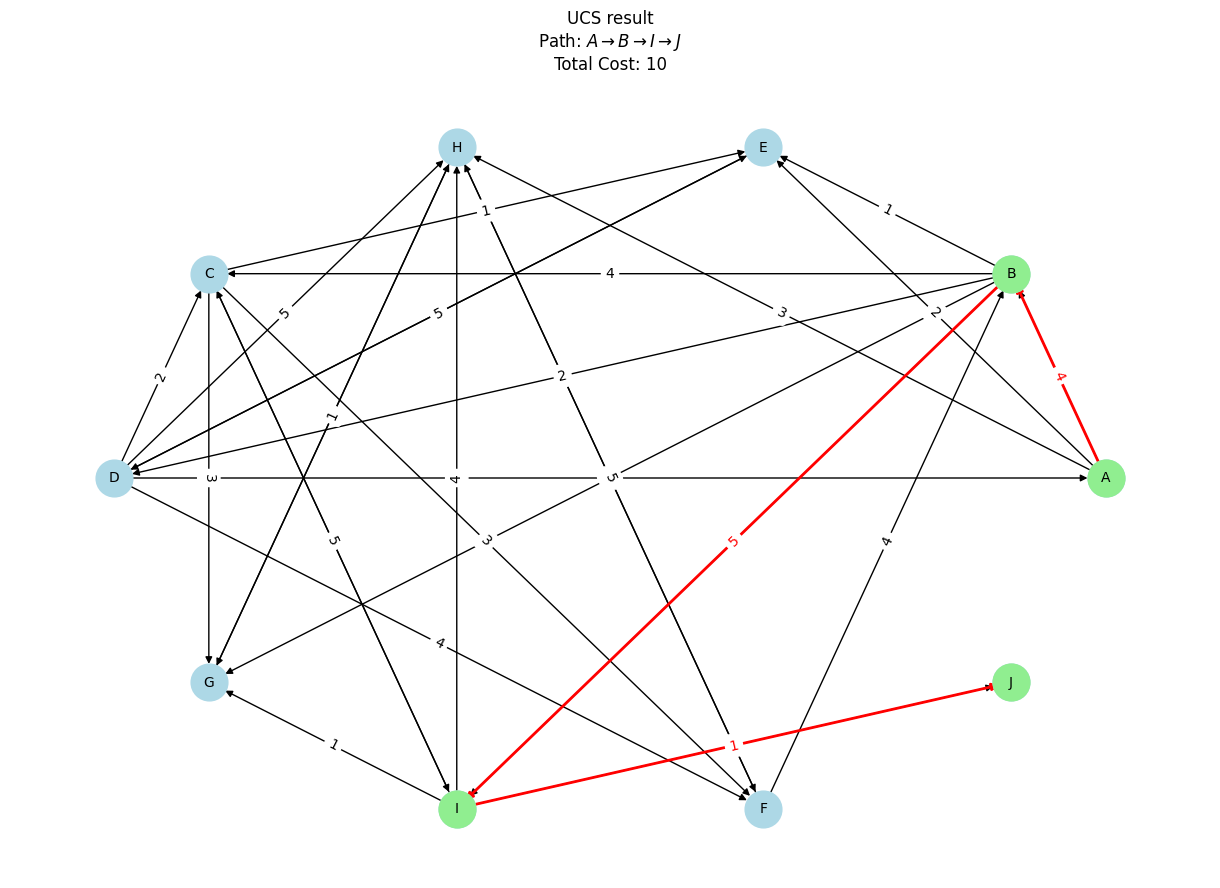

In [9]:
G.draw(path = path, title = 'UCS result')

## 4. Búsqueda $A^*$

Finalmente ejecute búsqueda $A∗$. Tenga en cuenta que si hay empates en la cola de prioridad se extrae el estado con menor etiqueta.

In [10]:
path = AStarSearch(G,'A','J',verbose = True, reached = False)
if path: print('\nFinal path found: '+' -> '.join(path))

Out: A g: 0   h: 8   f: 8  
Out: B g: 4   h: 3   f: 7  
Out: I g: 9   h: 0   f: 9  
Out: C g: 8   h: 2   f: 10 
Out: D g: 6   h: 4   f: 10 
Out: C g: 8   h: 2   f: 10 
Out: I g: 10  h: 0   f: 10 
Out: I g: 10  h: 0   f: 10 
Out: J g: 10  h: 0   f: 10 

Out order: A B I C D C I I J

Final path found: A -> B -> I -> J


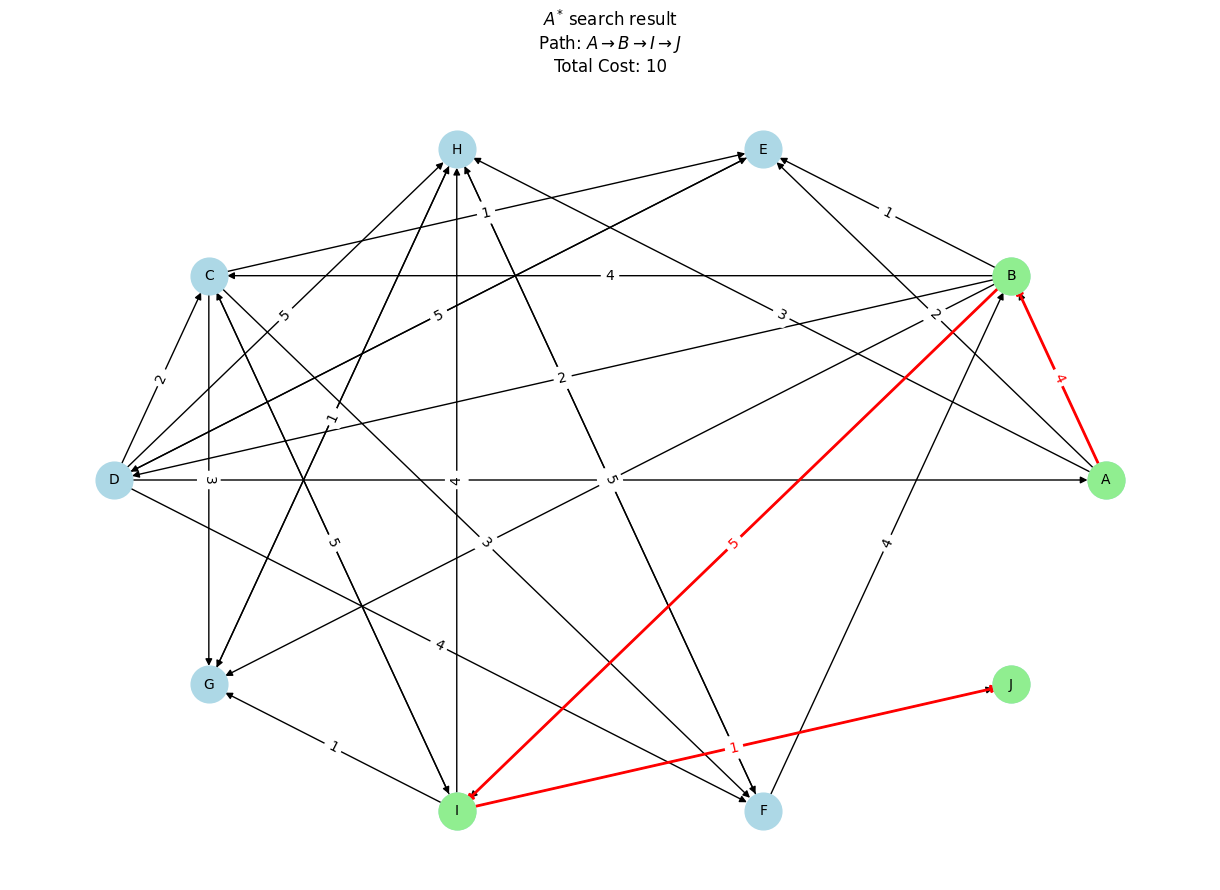

In [11]:
G.draw(path = path, title = '$A^{*}$ search result')